In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score


In [2]:
df=pd.read_csv("/home/illahi/ILAHI/car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape


(301, 9)

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# l=df["Car_Name"].value_counts()[df["Car_Name"].value_counts()<=5]
# df["Car_Name"]=df["Car_Name"].apply(lambda x:"Others" if x  in l else x)
# df["Car_Name"].value_counts()
l=df["Car_Name"].value_counts()
ne=l[l<=10]
df["Car_Name"]=df["Car_Name"].apply(lambda x:"Others" if x in ne else x)

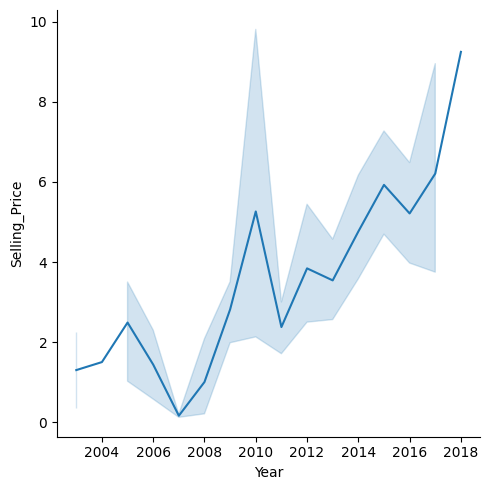

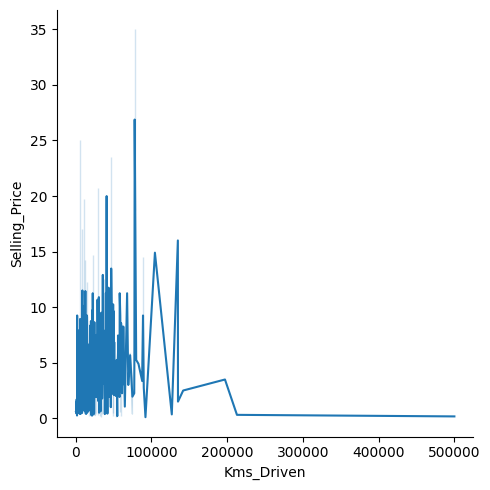

In [8]:
# plt.scatter(df["Selling_Price"],df["Car_Name"])
# plt.show()

# plt.scatter(df["Year"],df["Selling_Price"])
# plt.show()
sns.relplot(data=df,x=df["Year"],y=df["Selling_Price"],kind="line")
sns.relplot(data=df,x=df["Kms_Driven"],y=df["Selling_Price"],kind="line")



# sns.kdeplot(data=df,x=df["Year"],y=df["Selling_Price"])


In [9]:
df_corr=df.iloc[:,1:5]
df_corr.corr()

,Year,Selling_Price,Present_Price,Kms_Driven
Year,1.000000,0.236141,-0.047584,-0.524342
Selling_Price,0.236141,1.000000,0.878983,0.029187
Present_Price,-0.047584,0.878983,1.000000,0.203647
Kms_Driven,-0.524342,0.029187,0.203647,1.000000


<Axes: >

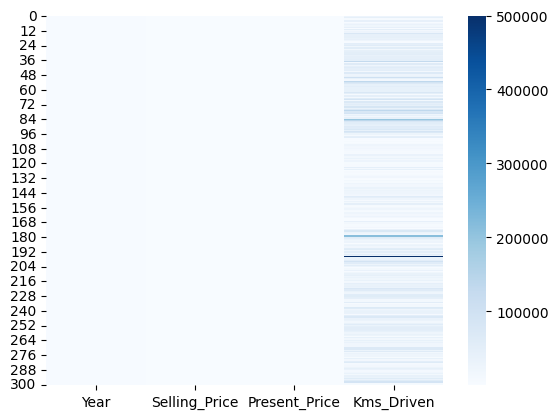

In [10]:
sns.heatmap(df_corr,cmap="Blues")


In [11]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["Transmission"]=label.fit_transform(df["Transmission"])
df["Fuel_Type"]=label.fit_transform(df["Fuel_Type"])
df["Seller_Type"]=label.fit_transform(df["Seller_Type"])
df["Car_Name"]=label.fit_transform(df["Car_Name"])
# df.replace(["Transmission":{"Manual":0,"Automatic":1}],inplace=True)

In [12]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0,2014,3.35,5.59,27000,2,0,1,0
1,0,2013,4.75,9.54,43000,1,0,1,0
2,0,2017,7.25,9.85,6900,2,0,1,0
3,0,2011,2.85,4.15,5200,2,0,1,0
4,0,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,1,2016,9.50,11.60,33988,1,0,1,0
297,0,2015,4.00,5.90,60000,2,0,1,0
298,1,2009,3.35,11.00,87934,2,0,1,0
299,1,2017,11.50,12.50,9000,1,0,1,0


In [13]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

st.fit_transform(df)


array([[-0.45869463,  0.128897  , -0.25841591, ..., -0.73728539,
         0.39148015, -0.17450057],
       [-0.45869463, -0.21751369,  0.01748088, ..., -0.73728539,
         0.39148015, -0.17450057],
       [-0.45869463,  1.16812909,  0.51015372, ..., -0.73728539,
         0.39148015, -0.17450057],
       ...,
       [ 0.48053723, -1.60315648, -0.25841591, ..., -0.73728539,
         0.39148015, -0.17450057],
       [ 0.48053723,  1.16812909,  1.34769755, ..., -0.73728539,
         0.39148015, -0.17450057],
       [-0.45869463,  0.8217184 ,  0.12586891, ..., -0.73728539,
         0.39148015, -0.17450057]])

In [22]:
X=df.drop(columns=["Selling_Price"])
y=df["Selling_Price"]


0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,random_state=42,test_size=0.1)

In [16]:
model1=LinearRegression()
model2=Lasso()
model1.fit(Xtrain,Ytrain)
model2.fit(Xtrain,Ytrain)

Lasso()

r2 score on train data using Linear  0.8808370698820297
r2 score on train data using Lasso  0.8436908785653828


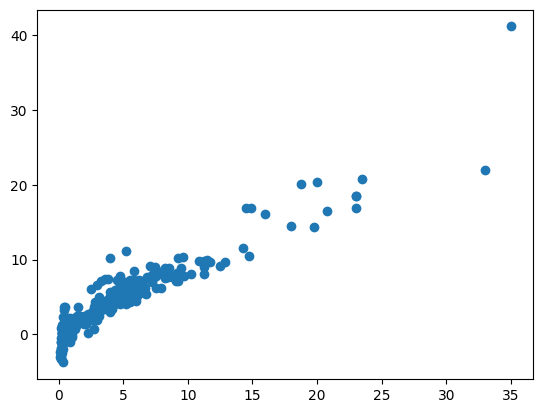

In [17]:
#prediction on training data
ypred1=model1.predict(Xtrain)
print("r2 score on train data using Linear ",r2_score(Ytrain,ypred1))
# model2.fit(Xtrain,Ytrain)
ypred2=model2.predict(Xtrain)
print("r2 score on train data using Lasso ",r2_score(Ytrain,ypred2))
plt.scatter(x=Ytrain,y=ypred1)

In [18]:
#prediction on test data
ypred1=model1.predict(Xtest)
print("r2 score on test data using Linear ",r2_score(Ytest,ypred1))
# model2.fit(Xtrain,Ytrain)
ypred2=model2.predict(Xtest)
print("r2 score on test data using Lasso ",r2_score(Ytest,ypred2))
from sklearn.model_selection import cross_val_score
print("Linear Regression cross val score",cross_val_score(model1,Xtest,Ytest).mean())
print("Lasso Regression cross val score",cross_val_score(model2,Xtest,Ytest).mean())

r2 score on test data using Linear  0.8298724078650526
r2 score on test data using Lasso  0.8392263764876017
Linear Regression cross val score 0.770428250596448
Lasso Regression cross val score 0.8290836469069254


In [27]:
l=[X.apply(lambda x:x[4])]
result=model1.predict(np.array(l))
result

/home/illahi/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.86398371])